# Compute and compare distances between shapes

In this file, we generate random polygons and compute a few candidates of distances. We will compare the values of distances, as well as the computational time.

In [1]:
import sys
sys.path.append('../Utils/')
from compute_kernel import compute_kernel_matrix

%load_ext autoreload
%autoreload 2

The cell below generates polygons of specified sizes. We use it to generate 200 polygons with 6 sides.

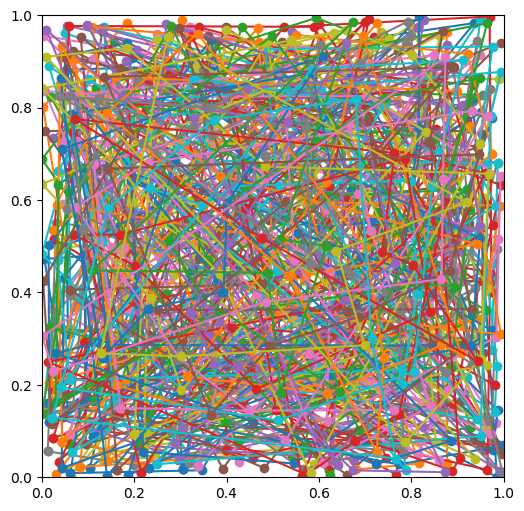

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_polygon(n_points):
    # Generate random points
    points = np.random.rand(n_points, 2)
    
    # Compute the centroid
    centroid = np.mean(points, axis=0)
    
    # Sort points by angle around the centroid
    angles = np.arctan2(points[:,1] - centroid[1], points[:,0] - centroid[0])
    sorted_indices = np.argsort(angles)
    polygon = points[sorted_indices]
    
    return polygon

def generate_polygons(n_polygons, n_points):
    polygons = [generate_random_polygon(n_points) for _ in range(n_polygons)]
    return polygons

def plot_polygons(polygons):
    plt.figure(figsize=(6,6))
    for polygon in polygons:
        poly = np.vstack([polygon, polygon[0]])  # Close the polygon
        plt.plot(poly[:,0], poly[:,1], marker='o')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal')
    plt.show()

# Example usage
n_polygons = 200
n_points = 6
polygons = generate_polygons(n_polygons, n_points)
plot_polygons(polygons)


Now we compute the distances for any arbitrary pair of those 200 polygons:

In [15]:

import time
start = time.time()
K_W = compute_kernel_matrix(polygons,normalize=False,kernel_type='W_mine',n_quantile = n_points**2,norm_const=1)
time_W = time.time() - start
start = time.time()
K_GW = compute_kernel_matrix(polygons,normalize=False,kernel_type='GW',norm_const=1)
time_GW = time.time() - start
start = time.time()
K_Ws = compute_kernel_matrix(polygons,normalize=False,kernel_type='W_stratified',n_quantile = n_points,n_align=n_points, norm_const=1)
time_WS = time.time() - start
start = time.time()
K_improved = compute_kernel_matrix(polygons,normalize=False,kernel_type='W_improved',n_quantile = n_points, norm_const=1)
time_SLB = time.time() - start

200
36
200
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
1

Compare the runtime for each distance as below:

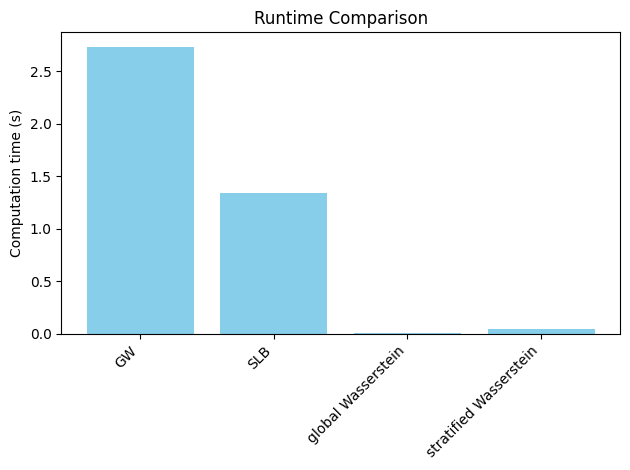

In [16]:
import matplotlib.pyplot as plt

labels = ['GW', 'SLB', 'global Wasserstein', 'stratified Wasserstein']
times = [time_GW, time_SLB, time_W, time_WS]

plt.bar(labels, times, color='skyblue')
plt.xticks(rotation=45, ha='right')   # rotate tick labels, not axis label
plt.ylabel("Computation time (s)")
plt.title("Runtime Comparison")
plt.tight_layout()  # avoids cutoff of rotated labels
plt.show()


Now we compare the distance values:

6


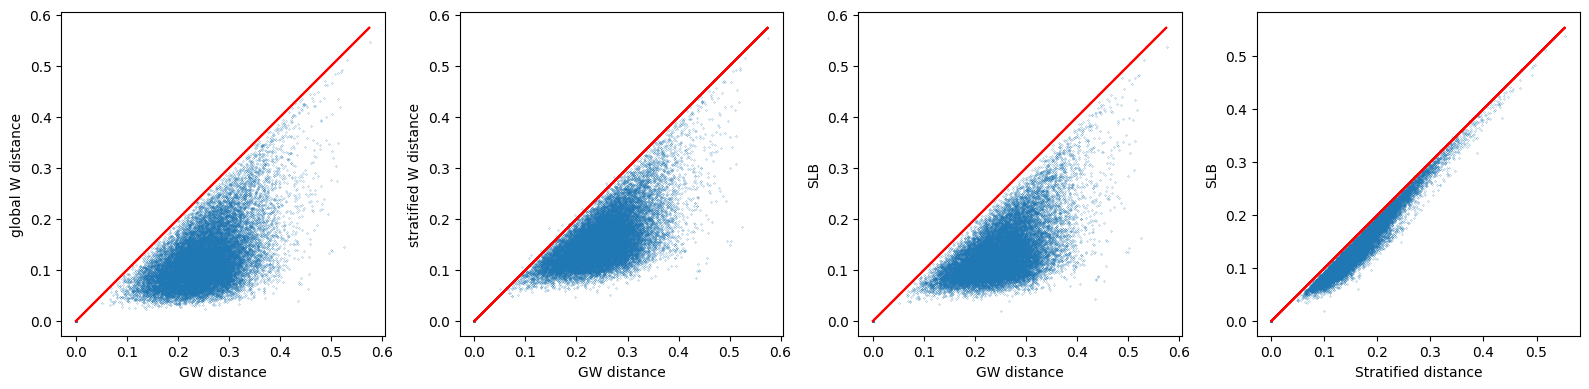

In [19]:
fig = plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.scatter(np.sqrt(K_GW.ravel()), K_W.ravel()*n_points, s=0.01)
plt.plot(np.sqrt(K_GW.ravel()), np.sqrt(K_GW.ravel()), 'r')
plt.xlabel('GW distance')
plt.ylabel('global W distance')
plt.axis('square')

plt.subplot(1,4,2)
plt.scatter( np.sqrt(K_GW.ravel()), K_Ws.ravel()*n_points, s=0.01)
plt.plot(np.sqrt(K_GW.ravel()), np.sqrt(K_GW.ravel()), 'r')
plt.xlabel('GW distance')
plt.ylabel('stratified W distance')
plt.axis('square')

print(n_points)
plt.subplot(1,4,3)
plt.scatter( np.sqrt(K_GW.ravel()), K_improved.ravel()/10, s=0.01)#np.sqrt(n_points))
plt.plot(np.sqrt(K_GW.ravel()), np.sqrt(K_GW.ravel()), 'r')
plt.xlabel('GW distance')
plt.ylabel('SLB')
plt.axis('square')


plt.subplot(144)
plt.scatter(K_Ws.ravel()*n_points, K_improved.ravel()/10, s=0.01)
plt.plot(K_Ws.ravel()*n_points, K_Ws.ravel()*n_points, 'r')

plt.xlabel('Stratified distance')
plt.ylabel('SLB')
plt.axis('square')

plt.tight_layout()
# plt.subplot(1,4,3)
# plt.scatter(K_Ws.ravel(), K_W.ravel())
# plt.savefig('Figures/compare_distances.pdf',bbox_inches='tight')
# plt.xlabel('stratified W distance')
# plt.ylabel('W distance')


Below shows the same procedure but on T-shape. With symmetry, the stratified distance significantly overestimates the distances between shapes.

In [20]:
def sample_T_equal_arms(N, L=2.0, W=0.1, alpha=5,seed=None):
    """
    Sample N points from the boundary of a thin T shape formed by three arms
    (left, right, down) of equal length and width meeting at a junction.

    Parameters:
    - N: number of points
    - L: length of each arm from the junction
    - W: width of each arm (small for thin shape)
    - seed: random seed

    Returns:
    - (N, 2) array of sampled boundary points
    """
    if seed is not None:
        np.random.seed(seed)

    # Define the 3 arm rectangles: (center_x, center_y, width, height)
    rects = [
        (0, -L/2, W, L),        # vertical arm (downward)
        (-L/2, 0, L, W),        # left arm
        ( L/2, 0, L, W)         # right arm
    ]

    # Compute perimeters
    perims = [2 * (w + h) for (_, _, w, h) in rects]
    total_perim = sum(perims)
    ns = [int(round(N * p / total_perim)) for p in perims]
    ns[-1] += N - sum(ns)  # ensure total samples = N

    def sample_rectangle_boundary(n, cx, cy, w, h):
        pts = []
        perim = 2 * (w + h)
        # s = np.sort(np.random.rand(n) * perim)
        u = np.random.rand(n)
        # emphasize values near 0 or 1 (edges)
        u = np.where(np.random.rand(n) < 0.5, u**alpha, 1 - (1 - u)**alpha)
        s = np.sort(u * perim)

        for val in s:
            if val < w:
                x = cx - w/2 + val
                y = cy - h/2
            elif val < w + h:
                x = cx + w/2
                y = cy - h/2 + (val - w)
            elif val < 2*w + h:
                x = cx + w/2 - (val - (w + h))
                y = cy + h/2
            else:
                x = cx - w/2
                y = cy + h/2 - (val - (2*w + h))
            pts.append((x, y))
        return np.array(pts)

    pts_all = []
    for n, (cx, cy, w, h) in zip(ns, rects):
        pts_all.append(sample_rectangle_boundary(n, cx, cy, w, h))

    return np.vstack(pts_all)

In [21]:
# Example usage
n_polygons = 200
polygons = [0]*n_polygons
for i in range(n_polygons):
    polygons[i] = sample_T_equal_arms(100, L=1.0, W=0.1, seed=i, alpha=5)
# plot_polygons(polygons)

In [29]:
n_points = 100
import time
start = time.time()
K_W = compute_kernel_matrix(polygons,normalize=False,kernel_type='W_mine',n_quantile = n_points**2,norm_const=1)
time_W = time.time() - start
start = time.time()
K_GW = compute_kernel_matrix(polygons,normalize=False,kernel_type='GW',norm_const=1)
time_GW = time.time() - start
start = time.time()
K_Ws = compute_kernel_matrix(polygons,normalize=False,kernel_type='W_stratified',n_quantile = n_points,n_align=n_points, norm_const=1)
time_WS = time.time() - start
start = time.time()
K_improved = compute_kernel_matrix(polygons,normalize=False,kernel_type='W_improved',n_quantile = n_points, norm_const=1)
time_SLB = time.time() - start

200
10000
200
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
10

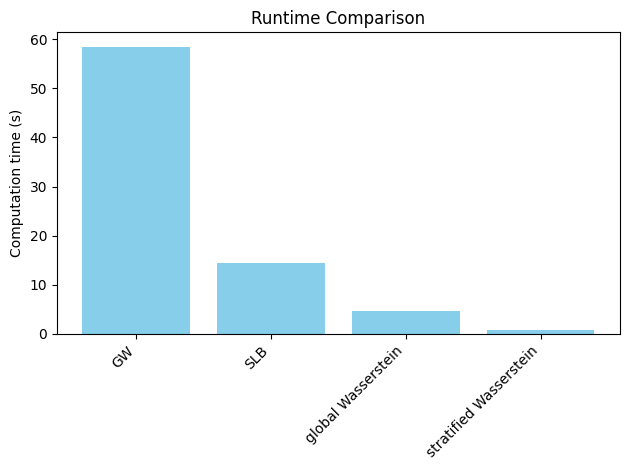

In [30]:
import matplotlib.pyplot as plt

labels = ['GW', 'SLB', 'global Wasserstein', 'stratified Wasserstein']
times = [time_GW, time_SLB, time_W, time_WS]

plt.bar(labels, times, color='skyblue')
plt.xticks(rotation=45, ha='right')   # rotate tick labels, not axis label
plt.ylabel("Computation time (s)")
plt.title("Runtime Comparison")
plt.tight_layout()  # avoids cutoff of rotated labels
plt.show()

100


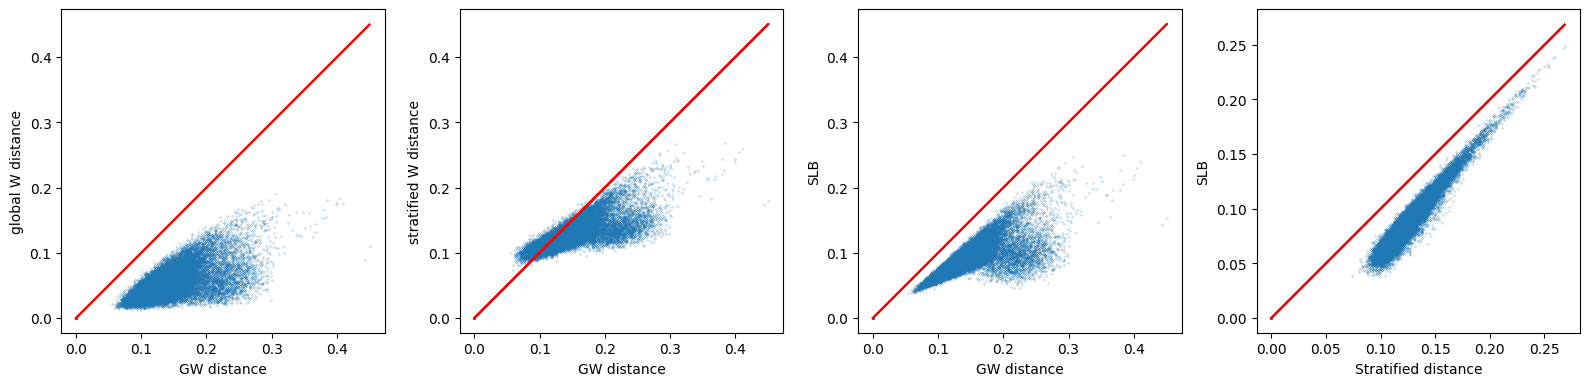

In [34]:
fig = plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
plt.scatter(np.sqrt(K_GW.ravel()), K_W.ravel()*n_points, s=0.01)
plt.plot(np.sqrt(K_GW.ravel()), np.sqrt(K_GW.ravel()), 'r')
plt.xlabel('GW distance')
plt.ylabel('global W distance')
plt.axis('square')

plt.subplot(1,4,2)
plt.scatter( np.sqrt(K_GW.ravel()), K_Ws.ravel()*n_points, s=0.01)
plt.plot(np.sqrt(K_GW.ravel()), np.sqrt(K_GW.ravel()), 'r')
plt.xlabel('GW distance')
plt.ylabel('stratified W distance')
plt.axis('square')

print(n_points)
plt.subplot(1,4,3)
plt.scatter( np.sqrt(K_GW.ravel()), K_improved.ravel()/10, s=0.01)#np.sqrt(n_points))
plt.plot(np.sqrt(K_GW.ravel()), np.sqrt(K_GW.ravel()), 'r')
plt.xlabel('GW distance')
plt.ylabel('SLB')
plt.axis('square')


plt.subplot(144)
plt.scatter(K_Ws.ravel()*n_points, K_improved.ravel()/10, s=0.01)
plt.plot(K_Ws.ravel()*n_points, K_Ws.ravel()*n_points, 'r')

plt.xlabel('Stratified distance')
plt.ylabel('SLB')
plt.axis('square')

plt.tight_layout()
# plt.subplot(1,4,3)
# plt.scatter(K_Ws.ravel(), K_W.ravel())
# plt.savefig('Figures/compare_distances_T.pdf',bbox_inches='tight')